In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
#import previous df from sqlite
con = sqlite3.connect('twitter_hate.db')
sql = """
SELECT * FROM tweets_nlp
"""
with sqlite3.connect('twitter_hate.db') as con:
    df = pd.read_sql_query(sql, con)

In [3]:
tweets = df['tweet_clean']

mentions = []
urls = []
hashtags = []
i = 0
for tweet in tweets:
    tweet = tweet.split()
    mentions.append(tweet.count('mentionhere')+tweet.count('mentionhere:')+tweet.count('"mentionhere:')+tweet.count('&#;mentionhere:'))
    urls.append(tweet.count('urlhere'))
    hashtags.append(tweet.count('hashtaghere'))
    tweet = [token for token in tweet if token not in [';&','']]
    tweet = [token for token in tweet if token not in ['&#;mentionhere:','mentionhere:','"mentionhere:','mentionhere', 'urlhere', 'hashtaghere', 'rt', 'amp']]
    tweet = " ".join(tweet)
    tweets[i] = tweet
    i += 1
    
df['tweet_no_others'] = tweets
df['mention_count'] = mentions
df['url_count'] = urls
df['hashtag_count'] = hashtags

C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [4]:
df.head()

,level_0,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens,tweet_no_others,mention_count,url_count,hashtag_count
0,0,17,3,1,2,0,1,""" bitch who do you love """,bitch who do you love,bitch who do -PRON- love,bitch,,love,bitch love,5.0,bitch who do you love,0,0,0
1,1,23,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#1...",fuck no that bitch dont even suck dick the ker...,fuck no that bitch do not even suck dick ...,bitch dick kermit video bout,,suck fuck,bitch dick kermit video bout suck fuck,18.0,fuck no that bitch dont even suck dick the ker...,0,0,0
2,2,38,3,0,2,1,1,""" lames crying over hoes thats tears of a clown """,lames crying over hoes thats tears of a clown,lame cry over hoe that s tear of a clown,lame hoe tear clown,,cry s,lame hoe tear clown cry s,10.0,lames crying over hoes thats tears of a clown,0,0,0
3,3,59,3,0,3,0,1,"""..All I wanna do is get money and fuck model ...",all i wanna do is get money and fuck model bit...,all i wanna do be get money and fuck model bit...,wanna money fuck model bitch russell simmons,,,wanna money fuck model bitch russell simmons,14.0,all i wanna do is get money and fuck model bit...,0,0,0
4,4,62,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",females think dating a pussy is cute now how d...,mentionhere female think date a pussy be cut...,mentionhere female pussy stuff pussy,,think date urlhere do make,mentionhere female pussy stuff pussy think dat...,22.0,females think dating a pussy is cute now how d...,1,1,0


In [5]:
corpus = df['tweet_no_others']

### Bag of Words Features

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,above,...,zimmerman,zimmy,zion,zionist,zipperheads,zoe,zog,zone,zoom,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training the model

In [8]:
X = pd.concat([pd.DataFrame(cv_matrix, columns=vocab), df[['mention_count', 'url_count', 'hashtag_count']]], axis = 1)
y = df['class'].astype(int)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

In [11]:
gnb = GaussianNB()
param_grid = [{}]
grid_search = GridSearchCV(gnb, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds = grid_search.fit(X_train, y_train).predict(X_test)

C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


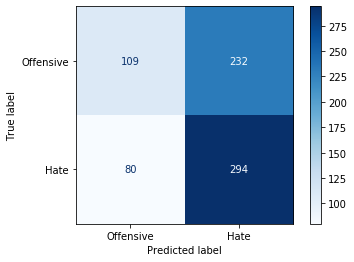

In [12]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Offensive', 'Hate']
plot_confusion_matrix(grid_search, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [13]:
from sklearn.metrics import classification_report
report = classification_report( y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.32      0.41       341
           1       0.56      0.79      0.65       374

    accuracy                           0.56       715
   macro avg       0.57      0.55      0.53       715
weighted avg       0.57      0.56      0.54       715



In [14]:
from sklearn.svm import SVC
svc = SVC()
param_grid = [{}]
grid_search2 = GridSearchCV(svc, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds2 = grid_search2.fit(X_train, y_train).predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


C:\Users\seanx\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  21.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.7s remaining:    0.0s


[CV] ................................................. , total=  22.9s
[CV]  ................................................................
[CV] ................................................. , total=  22.7s
[CV]  ................................................................
[CV] ................................................. , total=  21.6s
[CV]  ................................................................
[CV] ................................................. , total=  23.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


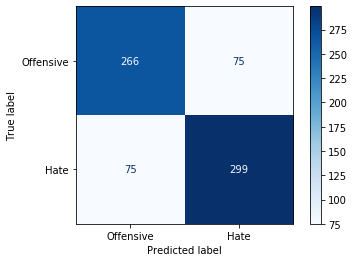

In [15]:
plot_confusion_matrix(grid_search2, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [16]:
report2 = classification_report( y_test, y_preds2)
print(report2)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       341
           1       0.80      0.80      0.80       374

    accuracy                           0.79       715
   macro avg       0.79      0.79      0.79       715
weighted avg       0.79      0.79      0.79       715



#### Without count features:

In [17]:
X_nc = pd.DataFrame(cv_matrix, columns=vocab)
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_nc, y, random_state=42)

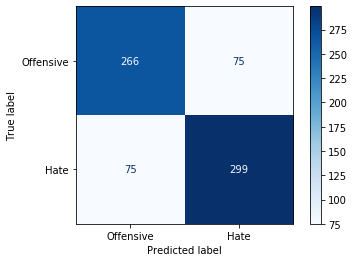

In [18]:
y_preds_nc = svc.fit(X_train_nc, y_train_nc).predict(X_test_nc)

plot_confusion_matrix(svc, X_test_nc, y_test_nc, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [19]:
report_nc = classification_report( y_test_nc, y_preds_nc)
print(report_nc)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       341
           1       0.80      0.80      0.80       374

    accuracy                           0.79       715
   macro avg       0.79      0.79      0.79       715
weighted avg       0.79      0.79      0.79       715



### Word2vec embedding


In [20]:
from gensim.models import word2vec
import nltk

In [21]:
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['hate','love','nigger','faggot','bitch','pussy','cracker','nigga','homo','cunt','fuck','trash','queer']}
similar_words

{'hate': ['dairy', 'ing', 'bus', 'cripples', 'goddamit'],
 'love': ['mitchell', 'victoria', 'hrs', 'salty', 'scrappy'],
 'nigger': ['profile', 'an', 'orders', 'alien', 'armed'],
 'faggot': ['fag', 'studies', 'phone', 'color', 'bitching'],
 'bitch': ['hoe', 'heart', 'rules', 'dont', 'fish'],
 'pussy': ['pressed', 'swill', 'alcohol', 'test', 'teairri'],
 'cracker': ['park', 'faves', 'moslems', 'latino', 'slants'],
 'nigga': ['lame', 'yah', 'wishywashy', 'fence', 'sneak'],
 'homo': ['frustrated', 'okcupid', 'michael', 'ability', 'plus'],
 'cunt': ['managers', 'liar', 'whilst', 'following', 'mexican'],
 'fuck': ['consider', 'flying', 'talking', 'hmm', 'smart'],
 'trash': ['uf', 'ds', 'white', 'slave', 'grier'],
 'queer': ['publicity', 'fed', 'minor', 'according', 'movement']}

In [22]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.410296,-0.780364,0.413076,0.235050,-0.214939,0.546095,0.490745,-0.772560,0.377348,-0.890203,...,-0.856220,-0.217035,-0.070195,-0.198996,-0.030772,0.178545,-1.626359,0.892774,-0.187786,-0.134653
1,0.857492,-0.756740,-0.142148,-0.038376,-0.112330,0.407841,0.662294,-0.555981,0.443156,-0.691172,...,-0.368247,0.348397,-0.070826,0.353388,0.256617,0.336659,-0.097897,0.470536,-0.305539,-0.353740
2,0.424459,-0.445477,0.018895,0.010608,0.029276,0.322159,0.240730,-0.284806,0.340690,-0.503499,...,-0.579517,-0.182222,-0.218175,0.111995,0.277542,0.220853,-0.541828,0.650186,-0.174245,-0.578006
3,0.823429,-0.540310,0.410484,0.115324,-0.140091,0.266952,0.329386,-0.944352,0.459490,-0.755420,...,-0.500771,-0.041142,-0.199972,-0.174571,0.510952,0.099543,-0.951464,0.669723,-0.456836,-0.227376
4,0.378984,-0.055286,-0.723685,0.066927,0.093515,0.321036,0.754004,-0.014090,-0.109098,-0.300182,...,-0.169638,-0.334203,-0.126462,0.595152,-0.151349,-0.135495,-0.102906,0.598372,0.215952,-0.364068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,-0.042217,-1.060025,0.392151,-0.217958,-0.315420,0.616878,0.357211,-0.789191,0.680764,-0.712170,...,-0.663162,0.133402,-0.127533,0.161797,-0.332113,0.662660,-1.140122,0.127669,-0.111924,-0.436522
2856,-0.585755,-0.129667,0.675121,-0.519526,-0.510560,-0.034046,-0.088171,-0.807538,1.183048,-0.785668,...,-1.625708,-0.313170,-0.274414,-0.268621,-0.020956,0.561839,-3.086119,0.912792,-0.219749,-0.149990
2857,-0.042381,-0.322894,-0.096278,-0.183077,-0.139315,0.045302,0.582402,-0.132209,0.637172,-0.337122,...,-1.014184,-0.186288,0.328939,0.482367,-0.307206,0.505020,-1.176121,0.674028,0.231360,-0.177043
2858,0.377671,-0.746037,-0.414184,-0.173470,-0.236663,0.147663,0.530398,-0.421517,0.166821,-0.754683,...,-0.042006,0.172560,-0.451052,0.467835,0.032448,0.454172,0.275907,0.152480,-0.378252,-0.254473


In [23]:
X_w2v = w2v_feature_array
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, random_state=42)



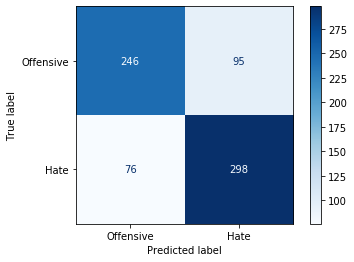

In [24]:
y_preds_w2v = svc.fit(X_train_w2v, y_train_w2v).predict(X_test_w2v)
plot_confusion_matrix(svc, X_test_w2v, y_test_w2v, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [25]:
report_w2v = classification_report( y_test_w2v, y_preds_w2v)
print(report_w2v)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       341
           1       0.76      0.80      0.78       374

    accuracy                           0.76       715
   macro avg       0.76      0.76      0.76       715
weighted avg       0.76      0.76      0.76       715



### GloVe Embedding

In [26]:
import spacy

nlp = spacy.load('en_core_web_lg')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 684831


In [27]:
unique_words = list(set([word for sublist in [doc.split() for doc in corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
limit,-0.472120,0.282110,-0.303530,-0.030768,-0.014271,0.144720,-0.110020,-0.116000,0.249290,1.79270,...,0.220550,-0.048933,0.196760,-0.090780,-0.109020,0.126590,0.058464,-0.290680,0.335430,-0.293960
you,-0.110760,0.307860,-0.519800,0.035138,0.103680,-0.052505,-0.180210,-0.118390,-0.054253,2.49800,...,-0.188920,0.278370,-0.385010,-0.114080,0.281910,-0.309460,-0.218780,-0.059105,0.476040,0.056610
talking,-0.396180,0.108890,-0.640060,0.133370,0.202170,0.081572,0.123420,-0.479270,-0.065611,2.55190,...,0.092547,-0.372180,-0.144550,0.207120,0.074350,0.416420,-0.161180,0.206910,-0.109030,0.173490
whatever,-0.026005,0.047861,-0.112810,0.041078,-0.088422,0.240360,-0.365690,-0.137690,-0.208370,2.48140,...,-0.235020,-0.006965,-0.301560,0.028522,0.008039,-0.230000,-0.280650,-0.423180,0.075031,0.112480
activities,0.264820,-0.205650,0.016968,-0.153390,-0.184740,0.574640,-0.183770,0.326080,0.157370,2.89930,...,0.113220,0.313320,0.016040,0.147560,0.424790,-0.074378,-0.013322,-0.094296,0.132050,0.014466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
precious,-0.442210,-0.242130,0.063580,0.693100,-0.297110,-0.147970,0.007393,-0.316520,-0.741420,1.87120,...,-0.880740,0.000868,-0.051386,0.196130,0.206880,0.267550,-0.196490,0.033094,-0.487340,-0.102780
ginger,-0.427640,0.111310,-0.271110,0.291840,-0.362900,0.095462,-0.857310,-0.030025,-0.092937,0.29975,...,0.140660,0.103610,-0.322630,-0.282860,-0.520040,0.210760,-0.180850,-0.960970,-0.296910,-0.051259
compete,-0.155100,-0.198480,0.187690,-0.074618,0.038289,-0.699890,0.451730,0.612990,-0.100380,2.50270,...,-0.517950,-0.244620,-0.327840,-0.578820,-0.353250,0.218810,0.103420,-0.608710,0.414670,0.465880
perceived,-0.424420,-0.051004,0.109990,0.252900,-0.300030,-0.041598,0.082652,0.413950,-0.413610,2.61770,...,-0.227850,0.423180,0.083814,-0.051706,0.350240,0.767050,-0.206110,0.056389,0.118420,0.103150


In [40]:
def averaged_word_vectorizer_glv(corpus, model, num_features):
    vocabulary = set(unique_words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

glv_feature_array = averaged_word_vectorizer_glv(corpus=tokenized_corpus, model=word_glove_vectors,
                                             num_features=feature_size)
pd.DataFrame(glv_feature_array)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [37]:
set(w2v_model.wv.index2word)


{'limit',
 'talking',
 'you',
 'whatever',
 'activities',
 'butt',
 'two',
 'knockin',
 'headed',
 'neutron',
 'h',
 'sofa',
 'southerners',
 'khloe',
 'suspend',
 'smiles',
 'extra',
 'faggot',
 'nae',
 'galaxy',
 'reserved',
 'menacesociety',
 'tale',
 'sweeter',
 'stuffed',
 'hills',
 'bullets',
 'bras',
 'have',
 'nag',
 'baby',
 'spanish',
 'guessed',
 'gave',
 'say',
 'mitchell',
 'conversation',
 'continue',
 'officially',
 'stupid',
 'brightest',
 'chill',
 'tanaka',
 'calmed',
 'crib',
 'went',
 'deal',
 'bittersweet',
 'zoom',
 'future',
 'reading',
 'dj',
 'psychotic',
 'body',
 'migos',
 'fosters',
 'break',
 'nicole',
 'smokin',
 'wench',
 'aa',
 'tank',
 'shooters',
 'tuck',
 'typical',
 'executed',
 'republicans',
 'engineering',
 'whole',
 'tomorrow',
 'gives',
 'throw',
 'mortal',
 'soft',
 'dripping',
 'end',
 'dairy',
 'abraham',
 'af',
 'nawwww',
 'cutting',
 'bit',
 'message',
 'gonna',
 'omg',
 'successful',
 'tired',
 'allstar',
 'schinder',
 'american',
 'based'

In [29]:
X_glv = glv_feature_array
X_train_glv, X_test_glv, y_train_glv, y_test_glv = train_test_split(X_glv, y, random_state=42)

NameError: name 'glv_feature_array' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_preds_glv = rf.fit(X_train_glv, y_train_glv).predict(X_test_glv)
plot_confusion_matrix(rf, X_test_glv, y_test_glv, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [ ]:
report_glv = classification_report( y_test_glv, y_preds_glv)
print(report_glv)